### Import Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mas/70/I5.csv")
df.head()

,Week,I
0,"January 10, 2021",1853.32
1,"January 17, 2021",1976.04
2,"January 24, 2021",1377.24
3,"January 31, 2021",1747.52
4,"February 7, 2021",2245.50


In [ ]:
#for i in range(2,5):
  #df=pd.read_csv(f"/content/drive/MyDrive/Mas/46Items_with date/I{i}.csv")

### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Week    70 non-null     object 
 1   I       70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
df.describe()

,I
count,70.000000
mean,2362.175286
std,730.084406
min,1324.830000
25%,1709.330000
50%,2277.390000
75%,2958.942500
max,3802.380000


In [ ]:
df["Week"]=pd.to_datetime(df["Week"])
df.set_index(['Week'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2021-01-10 to 2022-05-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       70 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [ ]:
df.head()

,I
Week,
2021-01-10,1853.32
2021-01-17,1976.04
2021-01-24,1377.24
2021-01-31,1747.52
2021-02-07,2245.50


In [ ]:
df.index.freq = 'MS'

ValueError: ignored

In [ ]:
df.isnull().sum()

I    0
dtype: int64

### Plot the data

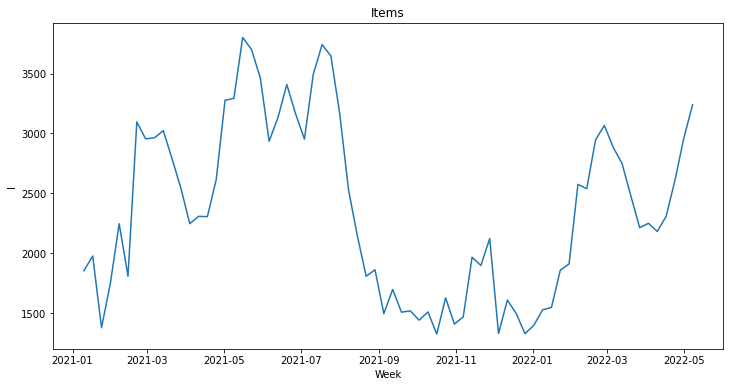

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['I'])
plt.title("Items")
plt.ylabel("I")
plt.xlabel("Week")
plt.show()

In [ ]:
df.index[df.index.week==52]

DatetimeIndex(['2022-01-02'], dtype='datetime64[ns]', name='Week', freq=None)

### Seasonality check

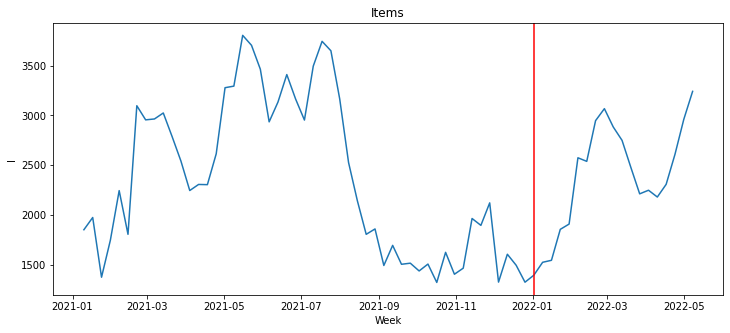

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['I'])
plt.title("Items")
plt.ylabel("I")
plt.xlabel("Week")
for x in df.index[df.index.week==52]:
    plt.axvline(x=x, color='red');
plt.show();

### Decompose the signal

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['I'], model='additive')
fig, axs = plt.subplots(2, 2,figsize=(15,8))
axs[0, 0].plot(result.observed)
axs[0, 0].autoscale(axis='x',tight=True)
axs[0, 0].set_title('Observed')
axs[0, 1].plot(result.trend,'tab:orange')
axs[0, 1].autoscale(axis='x',tight=True)
axs[0, 1].set_title('Trend')
axs[1, 0].plot(result.seasonal, 'tab:green')
axs[1, 0].autoscale(axis='x',tight=True)
axs[1, 0].set_title('Seasonal')
axs[1, 1].plot(result.resid, 'tab:red')
axs[1, 1].autoscale(axis='x',tight=True)
axs[1, 1].set_title('Residuals')
plt.show()

ValueError: ignored

### Shift the data

In [ ]:
df["I"].shift()

Week
2021-01-10        NaN
2021-01-17    1853.32
2021-01-24    1976.04
2021-01-31    1377.24
2021-02-07    1747.52
               ...   
2022-04-10    2249.40
2022-04-17    2181.32
2022-04-24    2308.43
2022-05-01    2609.10
2022-05-08    2960.23
Name: I, Length: 70, dtype: float64

In [ ]:
df["I"].shift().shift()

Week
2021-01-10        NaN
2021-01-17        NaN
2021-01-24    1853.32
2021-01-31    1976.04
2021-02-07    1377.24
               ...   
2022-04-10    2213.26
2022-04-17    2249.40
2022-04-24    2181.32
2022-05-01    2308.43
2022-05-08    2609.10
Name: I, Length: 70, dtype: float64

### Check for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result=adfuller(df)
    print("P Value: ",result[1])
    if result[1]<=0.05:
        print("Strong evidence aganist Null Hypothesis. So, reject Null Hypothesis and conclude data is stationary.")
        return(True)
    else:
        print("Weak evidence aganist Null Hypothesis. So, accept Null Hypothesis and conclude data is non-stationary.")
        return(False)
adf_test(df)

P Value:  0.1323801869210755
Weak evidence aganist Null Hypothesis. So, accept Null Hypothesis and conclude data is non-stationary.


False

### Automate conversion from non-stationary data to stationary data

In [ ]:
def convert_non_stationary_to_stationary(df):
    d=0
    new_df=df
    while True:
        new_df=new_df-new_df.shift()
        new_df.dropna(inplace=True)
        d=d+1
        if adf_test(new_df):
            print("d-value is",d)
            break

In [ ]:
convert_non_stationary_to_stationary(df)

P Value:  5.241265712542722e-05
Strong evidence aganist Null Hypothesis. So, reject Null Hypothesis and conclude data is stationary.
d-value is 1


### Split the data into train and test datasets

In [ ]:
train = df.iloc[:len(df)-13]
test = df.iloc[len(df)-13:]

In [ ]:
test

,I
Week,
2022-02-13,2538.92
2022-02-20,2947.10
2022-02-27,3067.43
2022-03-06,2884.32
2022-03-13,2749.58
2022-03-20,2478.21
2022-03-27,2213.26
2022-04-03,2249.40
2022-04-10,2181.32


### Auto ARIMA Model

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.3 MB/s 
     |████████████████████████████████| 9.9 MB 42.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
auto_arima(df['I'],seasonal=False,m=52).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -503.211
Date:                Fri, 16 Dec 2022   AIC                           1018.422
Time:                        09:36:07   BIC                           1031.913
Sample:                    01-10-2021   HQIC                          1023.781
                         - 05-08-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    344.9661    156.510      2.204      0.028      38.213     651.719
ar.L1          1.3707      0.326      4.204      0.000       0.732       2.010
ar.L2         -0.5131      0.290     -1.770      0.077      -1.081       0.055
ma.L1         -0.5373      0.292     -1.840      0.066      -1.110       0.035
ma.L2          0.3995      0.101      3.975      0.000       0.202       0.596
sigma2       9.99e+04   1.49e+04      6.707      0.000    7.07e+04    1.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.27
Prob(Q):                              0.79   Prob(JB):                         0.19
Heteroskedasticity (H):               0.54   Skew:                             0.29
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Fit the model with train dataset

In [ ]:
model = SARIMAX(train['I'],order=(1, 0, 0),seasonal_order=(0, 1, [], 52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  I   No. Observations:                   57
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                 -36.557
Date:                            Fri, 16 Dec 2022   AIC                             77.113
Time:                                    09:36:11   BIC                             76.332
Sample:                                01-10-2021   HQIC                            75.017
                                     - 02-06-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0164      0.584      0.028      0.978      -1.129       1.161
sigma2      1.354e+05   2.66e+05      0.510      0.610   -3.85e+05    6.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.83   Prob(JB):                         0.74
Heteroskedasticity (H):               0.45   Skew:                            -0.18
Prob(H) (two-sided):                  0.62   Kurtosis:                         1.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predict the model with test dataset

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predicted_values = results.predict(start=start, end=end)

2022-02-13    1812.772191
2022-02-20    3096.888285
2022-02-27    2955.081445
2022-03-06    2964.060024
2022-03-13    3023.940000
2022-03-20    2787.420000
2022-03-27    2541.900000
2022-04-03    2246.500000
2022-04-10    2307.380000
2022-04-17    2305.380000
2022-04-24    2614.780000
2022-05-01    3277.440000
2022-05-08    3293.400000
Freq: W-SUN, Name: predicted_mean, dtype: float64


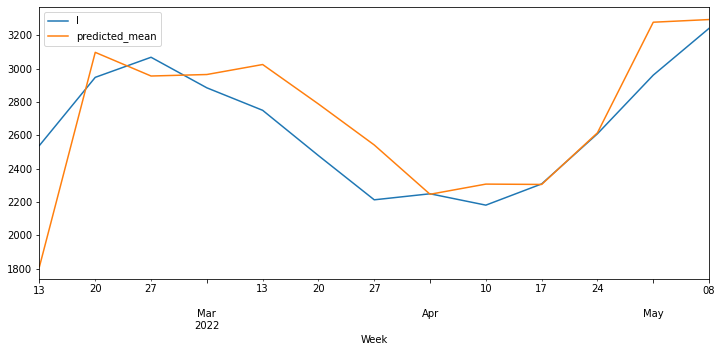

In [ ]:
ax = test['I'].plot(figsize=(12,5))
predicted_values.plot()
plt.legend()
ax.autoscale(axis='x',tight=True)
print(predicted_values)

In [ ]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f)))*100

    

In [ ]:
smape=smape(test['I'], predicted_values)
print(smape)

7.518229307854632


### Evaluate the model

In [ ]:
import sklearn as sk
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
print("mean_squared_error :",mean_squared_error(test['I'],predicted_values ))
print("root_mean_squared_error :",mean_squared_error(test['I'],predicted_values, squared=False))
print("mean_absolute_error :",mean_absolute_error(test['I'],predicted_values))
print("mean_absolute_percentage_error :",mean_absolute_percentage_error(test['I'],predicted_values))

mean_squared_error : 74379.51802404987
root_mean_squared_error : 272.72608607181286
mean_absolute_error : 191.3695901567751
mean_absolute_percentage_error : 0.07385640843002465


### Retrain the model with entire dataset

In [ ]:
model = SARIMAX(df['I'],order=(1, 0, 0),seasonal_order=(0, 1, [], 52))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  I   No. Observations:                   70
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood                -159.183
Date:                            Fri, 16 Dec 2022   AIC                            322.366
Time:                                    06:07:20   BIC                            324.147
Sample:                                01-10-2021   HQIC                           322.611
                                     - 05-08-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6644      0.171      3.890      0.000       0.330       0.999
sigma2      2.514e+06   9.41e+05      2.672      0.008     6.7e+05    4.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                 9.28
Prob(Q):                              0.28   Prob(JB):                         0.01
Heteroskedasticity (H):               0.51   Skew:                            -1.36
Prob(H) (two-sided):                  0.43   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast the Future

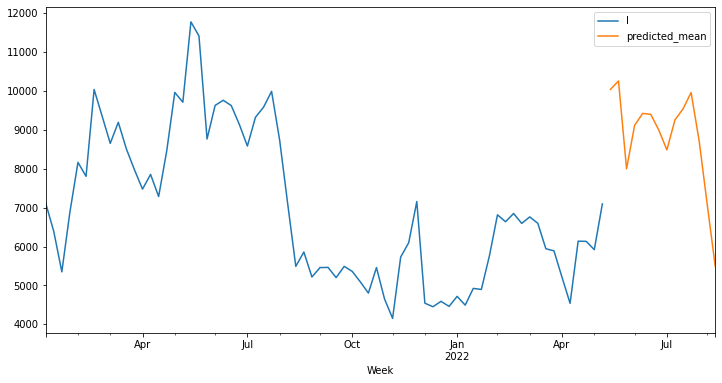

In [ ]:
predicted_values = results.predict(start=len(df), end=len(df)+13)
df['I'].plot(figsize=(12,6))
predicted_values.plot()
plt.legend()
plt.show()